In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [2]:
df = pd.read_csv("/Users/blakemidgley/Downloads/Real estate.csv")

In [3]:
df.isnull().sum()
#check for null values

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [4]:
df.index=df['No']
df=df.drop('No', axis=1)
#organizing for personal preference

In [5]:
column_names = {'X1 transaction date':'Transaction',
                'X2 house age': 'House Age',
                'X3 distance to the nearest MRT station':'Distance to MRT',
                'X4 number of convenience stores':'Number of Convenience Stores', 
                'X5 latitude':'Latitude',
                'X6 longitude':'Longitude',                
                'Y house price of unit area':'House Price'}
df = df.rename(columns = column_names)
#changing column names to more presentable titles

,Transaction,House Age,Distance to MRT,Number of Convenience Stores,Latitude,Longitude,House Price
Transaction,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
House Age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Distance to MRT,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
Number of Convenience Stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
House Price,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


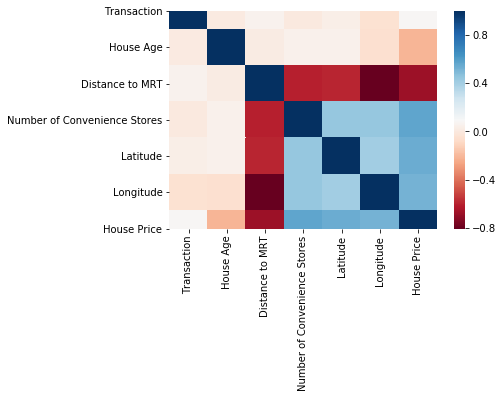

In [6]:
corr = df.corr()
display(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [7]:
df_before = df
X1 = sm.tools.add_constant(df_before)

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
print('Data Before Mulitcolinearity Removal')
print('-'*100)
display(series_before)
#Multicolinearity check... we're in the clear right off the get go :) no need to remove variables

Data Before Mulitcolinearity Removal
----------------------------------------------------------------------------------------------------


/Users/blakemidgley/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                           2.449535e+08
Transaction                     1.041906e+00
House Age                       1.136383e+00
Distance to MRT                 4.737890e+00
Number of Convenience Stores    1.761158e+00
Latitude                        1.711500e+00
Longitude                       2.926772e+00
House Price                     2.394467e+00
dtype: float64

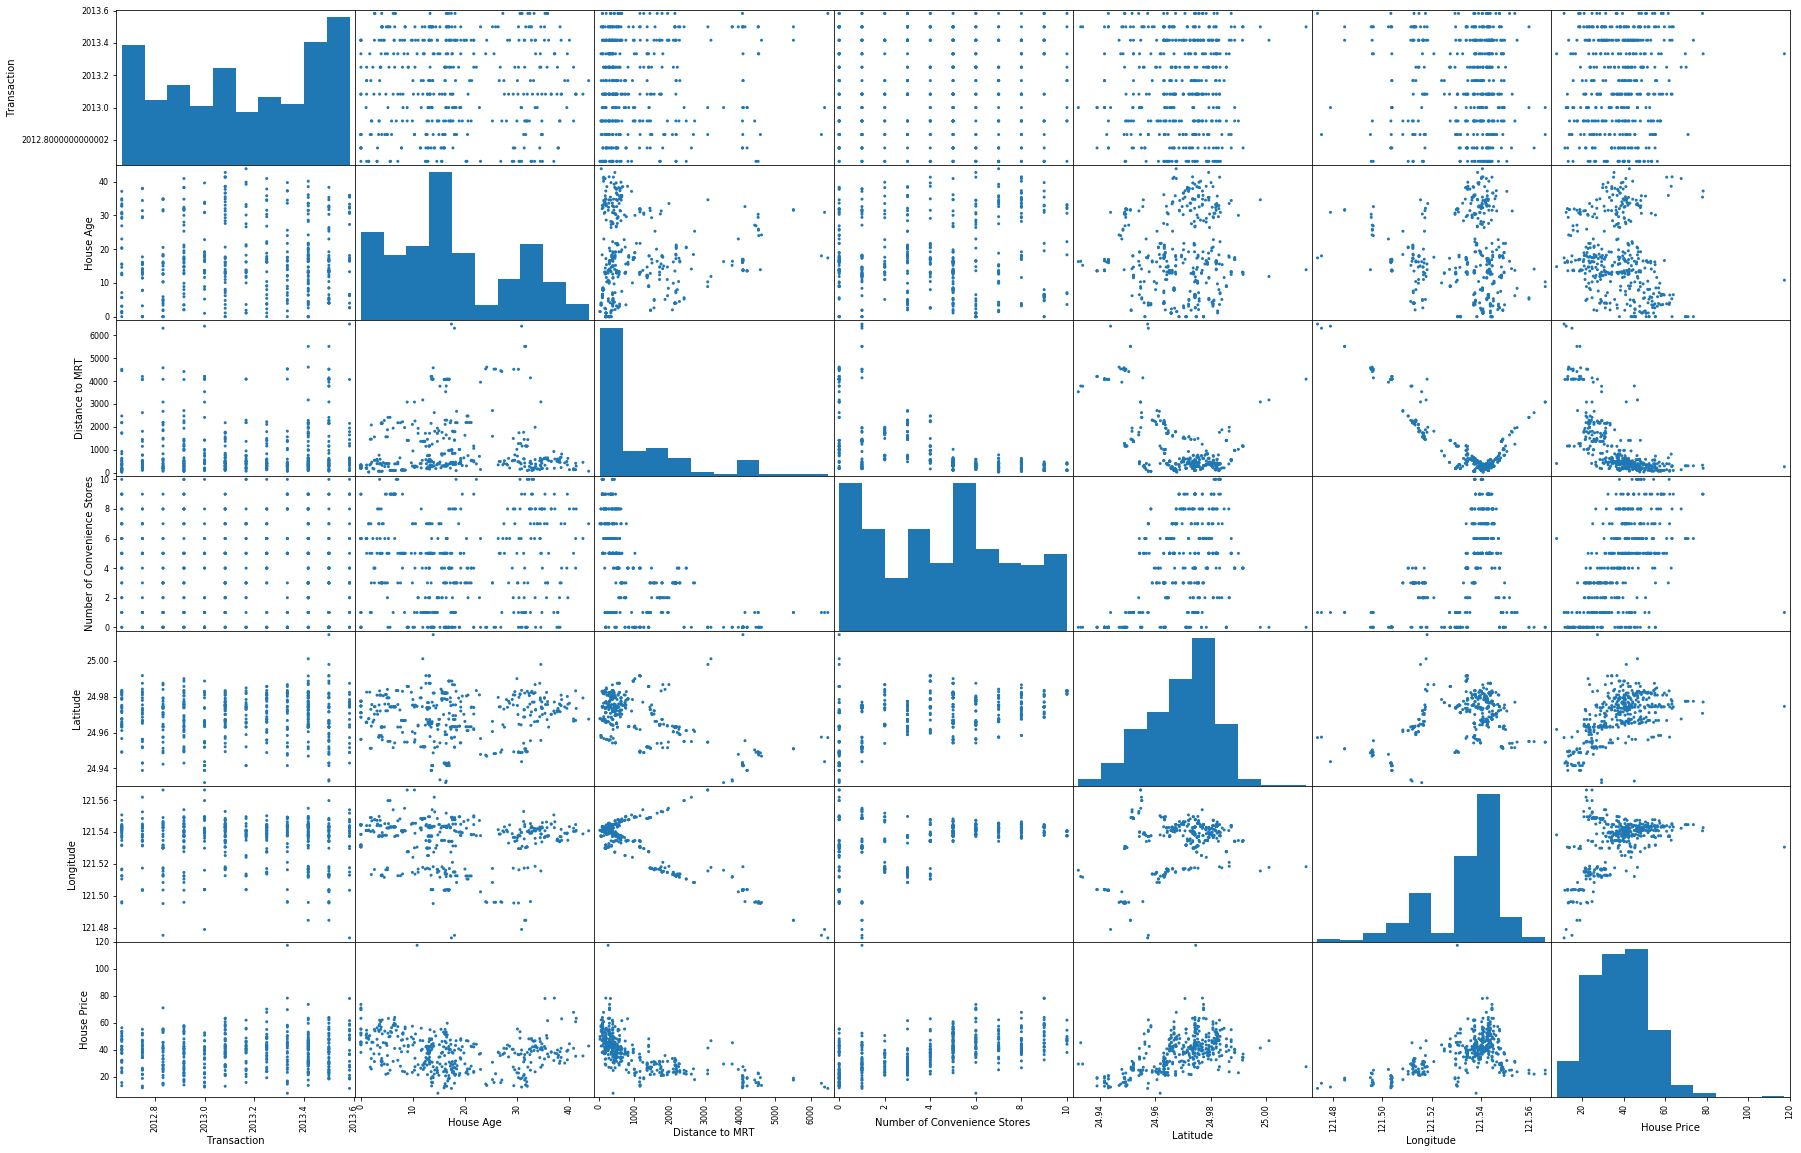

In [8]:
pd.plotting.scatter_matrix(df_before, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()

In [9]:
X = df.drop('House Price', axis = 1)
Y = df[['House Price']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

regression_model = LinearRegression()

regression_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

In [12]:
print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -1.28e+04
----------------------------------------------------------------------------------------------------
The Coefficient for Transaction is 5.7
The Coefficient for House Age is -0.25
The Coefficient for Distance to MRT is -0.0049
The Coefficient for Number of Convenience Stores is 1.1
The Coefficient for Latitude is 2.3e+02
The Coefficient for Longitude is -3.6e+01


In [13]:

y_predict = regression_model.predict(X_test)
#getting predictions

y_predict[:5]

array([[34.79742428],
       [47.46521888],
       [20.92649905],
       [12.44066887],
       [42.96379361]])

In [14]:
# defining intput
X2 = sm.add_constant(X)

model = sm.OLS(Y, X2)

# fiting data to model
est = model.fit()

/Users/blakemidgley/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

#checking for heterodasticity...p values are <5 so we FAIL to reject null hypothesis
#there is no heterodasticity

0.20636174444599104 0.20738896551743008
----------------------------------------------------------------------------------------------------


The number of lags will is 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.1054
We fail to reject the null hypthoesis, there is no autocorrelation.
----------------------------------------------------------------------------------------------------


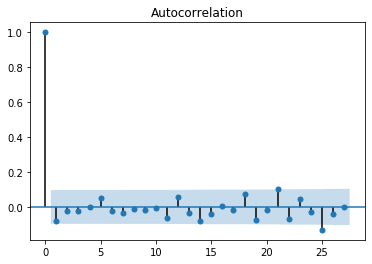

In [23]:

# testing for autocorrelation... there is none so the model is most likely accurate
from statsmodels.stats.stattools import durbin_watson

lag = min(10, (len(X)//5))
print('The number of lags will is {}'.format(lag))
print('-'*100)

test_results = diag.acorr_ljungbox(est.resid, lags = lag)

ibvalue, p_val = test_results

if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, there is autocorrelation.")
    print('-'*100)


sm.graphics.tsa.plot_acf(est.resid)
plt.show()

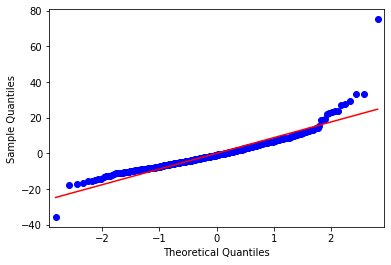

The mean of the residuals is 7.374e-12


In [24]:
import pylab

# checking for normality of the residuals.. data looks normally distributed... 7 is close enough to 0 as mean of residuals
sm.qqplot(est.resid, line='s')
pylab.show()
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [32]:
# calulcating the root mean squared error.. it's an acceptable size for the size of the data
model_mse = mean_squared_error(y_test, y_predict)
model_rmse =  math.sqrt(model_mse)

print("MSE {:.3}".format(model_mse))
print("RMSE {:.3}".format(model_rmse))

MSE 45.0
RMSE 6.71


In [33]:
#calculating r square... it's at an acceptable percentage
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.7


In [35]:
print(est.summary())
#longitude has high p value, but given that without context it's arbitrary, we will get rid of it in adjustment

                            OLS Regression Results                            
Dep. Variable:            House Price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     94.59
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           4.86e-74
Time:                        23:52:54   Log-Likelihood:                -1487.0
No. Observations:                 414   AIC:                             2988.
Df Residuals:                     407   BIC:                             3016.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [36]:
#adjusting the model 
df_after = df.drop(['Longitude','Latitude'], axis = 1)

X = df_after.drop('House Price', axis = 1)
Y = df_after[['House Price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            House Price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     127.7
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           1.23e-70
Time:                        00:03:42   Log-Likelihood:                -1500.0
No. Observations:                 414   AIC:                             3010.
Df Residuals:                     409   BIC:                             3030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

/Users/blakemidgley/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
#From model we can say that Transaction and Number of Convenience Stores have positive correlation with House Price...
#...House age and Distance to MRT hve negative correlation with House Price